In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv(r'D:\Projects\FYP prototype\ver 1.0\GPU\Mergers\base_api_IM.csv')
data

,chipset,core_clock,boost_clock,memory_clock,memory,memory_ver,bus_width,shaders,TMUs,ROPs,PCIe,TDP,rec_psu,detail_URL,api_score
0,GeForce RTX 3060,1320,1777,1875,8.0,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,44.43
1,GeForce RTX 3060,1320,1867,1875,8.0,6,128,3584,112,48,PCIe 4.0 x16,170,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,44.43
2,Radeon RX 6600,1626,1626,1750,8.0,6,128,1792,112,64,PCIe 4.0 x8,132,300 W,https://www.techpowerup.com/gpu-specs/radeon-r...,41.03
3,Radeon RX 6800 XT,1825,2250,2000,16.0,6,256,4608,288,128,PCIe 4.0 x16,300,700 W,https://www.techpowerup.com/gpu-specs/radeon-r...,76.41
4,Radeon RX 6700 XT,2321,2321,2000,12.0,6,192,2560,160,64,PCIe 4.0 x16,230,550 W,https://www.techpowerup.com/gpu-specs/radeon-r...,47.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Radeon HD 5570,550,550,800,1.0,3,128,400,20,8,PCIe 2.0 x16,39,200 W,https://www.techpowerup.com/gpu-specs/radeon-h...,1.47
273,GeForce GTX 465,608,607,802,1.0,5,256,352,44,32,PCIe 2.0 x16,200,550 W,https://www.techpowerup.com/gpu-specs/geforce-...,4.41
274,GeForce GTX 460 SE,650,660,850,1.0,5,256,288,48,32,PCIe 2.0 x16,150,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,3.23
275,GeForce GTX 560 SE,736,746,957,1.0,5,192,288,48,24,PCIe 2.0 x16,150,450 W,https://www.techpowerup.com/gpu-specs/geforce-...,3.61


In [3]:
from scipy import stats

In [4]:
z_scores = np.abs(stats.zscore(data['api_score']))
threshold = 3  # Typically, a threshold of 3 is used
data = data[z_scores < threshold]


In [4]:
#CSV file has columns 'X' and 'y' for features and target
X = data[['boost_clock', 'memory', 'memory_ver', 'bus_width', 'shaders', 'TMUs', 'ROPs']]
y = data['api_score']
#y = data['G3Dmark']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

In [34]:
model = SVR(kernel="linear" ,gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [20]:
#Create and train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.922160746038085


In [7]:
#Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 31.03596835806828


In [23]:
#Create and train model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.23716721414206


In [9]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 31.137694918883145


In [10]:
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet regression model with regularization parameters alpha and l1_ratio
model = ElasticNet(alpha=0.01, l1_ratio=0.9)  # alpha is the overall regularization strength, l1_ratio controls the balance between L1 and L2 regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 31.043526000070653


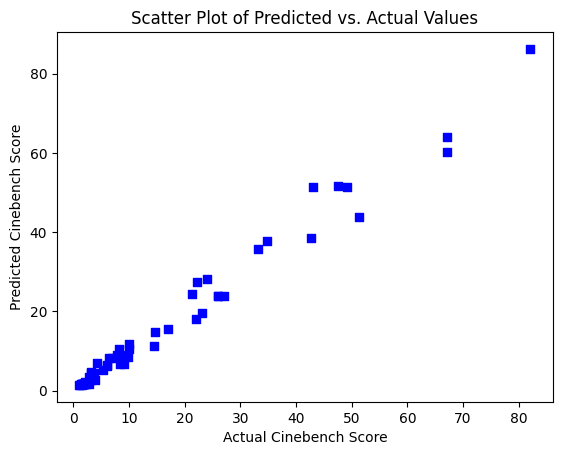

In [24]:
ax = plt.figure().add_subplot(111)

ax.scatter(y_test, y_pred, c='b', marker='s')
plt.xlabel("Actual Cinebench Score")
plt.ylabel("Predicted Cinebench Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

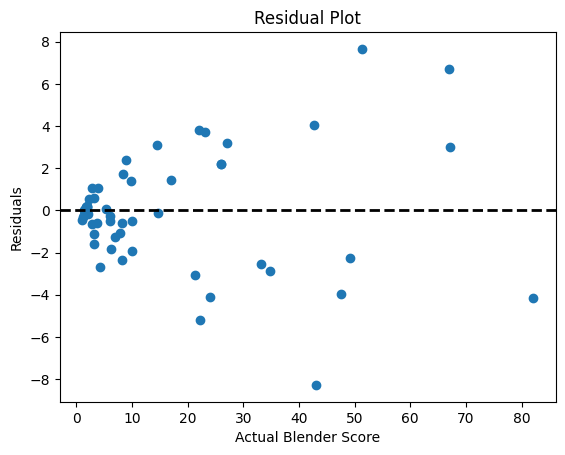

In [25]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Blender Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

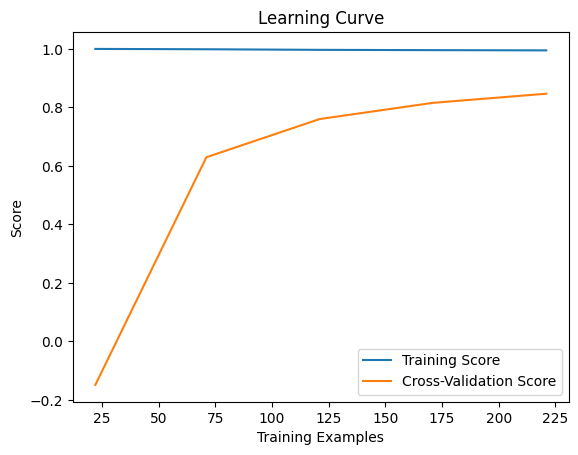

In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [27]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'api_predictor.pkl')